In [1]:
import pandas as pd
import numpy as np
import nltk

from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from PIL import Image
from bidi.algorithm import get_display
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS

In [2]:
car = open('C:/Users/Kfirt/Desktop/Data Science Project/komo.txt', 'r')
txt = car.read()
car.close()
ReversedText = get_display(txt)

In [3]:
vectorizer = CountVectorizer(stop_words = "english")
freq_vec = vectorizer.fit_transform([ReversedText]).toarray()
freqDist = dict(zip(vectorizer.get_feature_names(),freq_vec[0]))
freqDist['תבשב אל'] = freqDist['תבשב']
del freqDist['תבשב']
freqDist = dict(sorted(freqDist.items(), key = lambda item: item[1],reverse=True))

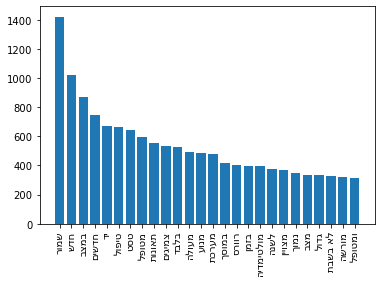

In [4]:
topK = 26
delWord = ['אלל' ,'םע' ,'דואמ', 'בכר', '000', 'אל', 'לכ', 'לש', 'בכרה', 'דע', 'קר','בקע', 'לע']
for item in delWord:
    del freqDist[item]

plt.bar(list(freqDist.keys())[:topK], list(freqDist.values())[:topK])
plt.xticks(list(freqDist.keys())[:topK], rotation = 'vertical')
plt.show()

In [5]:
def transform_format(val):
    if val != 0:
        return 255
    else:
        return val

    
image_file=Image.open("car.png")
image_file=image_file.convert('1')
car_mask = np.array(image_file)
mask = np.array(image_file)
transformed_car_mask = np.ndarray((car_mask.shape[0],car_mask.shape[1]), np.int32)

for i in range(len(car_mask)):
    transformed_car_mask[i] = list(map(transform_format, car_mask[i]))

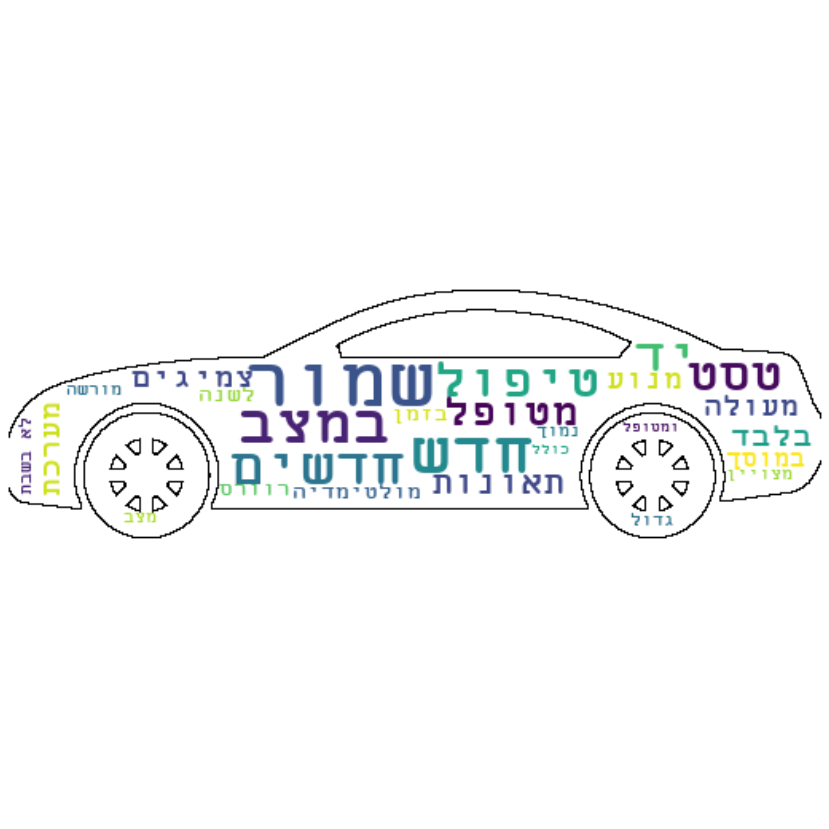

In [7]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
        font_path = 'C:\Windows\Fonts\courbd.ttf',
        background_color='white', 
        max_words=27,
        stopwords=stopwords,
        max_font_size=50,
        contour_width=1,
        mask = transformed_car_mask,
        collocations=False,
        random_state=1).generate_from_frequencies(freqDist)

plt.figure(figsize=[20,15])
plt.axis('off')
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()